# Bergische Universität Wuppertal #

**Fakultät Mathematik und Naturwissenschaften** 

**Angewandte Mathematik/Numerische Analysis**

*Dr. L. Teng*

*L. Kapllani, M.Sc.* 

*Summerterm 2021*


# Computational Finance I
**Lab-Exercise No. 2**


## Write your data

In [1]:
print("First Name: Dominik")
print("Sure Name: Wirsig")
print("Matriculation number: XXXXXXX")
print("Degree Type: Master") # Bachelor or Master
print("Degree Name: Master of Science in Computer Simulation in Science") # E.g. Master of Science in Computer Simulation in Science

First Name: Dominik
Sure Name: Wirsig
Matriculation number: XXXXXXX
Degree Type: Master
Degree Name: Master of Science in Computer Simulation in Science


# For the programming task write the corresponding Python codes that are asked in each section below.

# P2: Implied volatility
In the lecture we mentioned that the volatility of stock can not be directly observed.
Given option prices observed in the market, the volatility can be computed using Black-Scholes formula.
We will use the Newton-Raphson method to calculate the implied volatility.

## Import all necessary modules

In [2]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Start coding
**Note:** 
* Add code where you find the comment "# Add code here"
* Get the same output as it is presented in the Markdown text **Expected Output:**

## Define a function to calculate implied volatiliry using Newton-Raphson method

In [3]:
def impvol(S, r, T, K, C_market, sigma_0, tol):

    """
    Function that calculates implied volatility using Newton-Raphson method
    
        sigma(k+1) = sigma(k) - (C(sigma(k))- C_market)/k, 
    
    where sigma0 is an initial guess of volatility

    Input: 
          S       -> Stock price
          r       -> Interest rate
          T       -> Maturity
          K       -> Strike price
          C_market-> European option value (given)
          sigma_0 -> initial guess of implied volatility
          tol     -> tolerance for NR method

    Output:
         im_sigma -> Implied volatility
    """
    
    while True:
      d1 = ( log(S/K) + (r+sigma_0*sigma_0/2.0)*T ) / ( sigma_0*sqrt(T) )
      d2 = d1 - sigma_0*sqrt(T)
      # BC-Formula for Call option
      C = S*phi(d1) - K*np.exp(-r*T)*phi(d2)
      Kappa = S  * sqrt(T)  * normal_pdf(d1)
      im_sigma = sigma_0 - (C - C_market)/Kappa
      if abs(im_sigma - sigma_0) < tol or abs(sigma_0 - C_market) < tol:
        break
      sigma_0 = im_sigma
    return im_sigma

def normal_pdf(x):
  # probability density function for normal distribution
  return np.exp(-.5*x**2) / (sqrt(2*np.pi))
def phi(x):
  # cumulative destribution function
  return (1.0 + erf(x/sqrt(2.0))) / 2.0

Let $S=129,\,r=0,\,T=30/360.$ Test your code using the given market prices of European calls in the following table.
![title](table1.png)
For the Newton-Raphson method, use a tolerance of $10^{-10}$.

## Input parameters

In [4]:
# Input parameters
sigma_0 = 0.1
K = [*range(124, 137, 1)]
S0 = 129
r = 0
T = 30/360
C_market = [6.03, 5.23, 4.49, 3.79, 3.14, 2.55, 2.02, 1.59, 1.26, 1.00, 0.81, 0.67, 0.55]
tol = 1e-10

## Test the code based on above data: plot the graph, what do you observe?

Text(0, 0.5, 'Implied volatility')

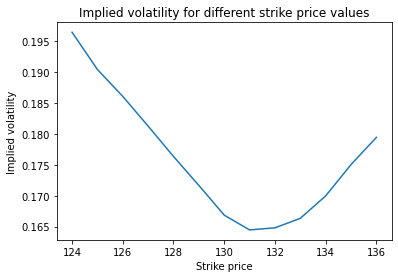

In [5]:
# Implement impvol function to calculate the implied volatility for each strike price and option price
x = np.zeros(13)
for i in range(0, 13):
  x[i] = impvol(S0, r, T, K[i], C_market[i], sigma_0, tol)

plt.plot(K, x)
plt.title('Implied volatility for different strike price values')
plt.xlabel('Strike price')
plt.ylabel('Implied volatility')

**Expected Output:**
![title](figure1.png)

### Will the implied volatilities using the corresponding market prices of European puts be same?

In [6]:
# Answer with a print statement
print('No, the implied volatilities using the corresponding market prices of European puts would not be the same. The Black-Scholes formula for the puts is different.')

No, the implied volatilities using the corresponding market prices of European puts would not be the same. The Black-Scholes formula for the puts is different.


In the lecture we have seen that the Black-Scholes model can be extended by including a time-dependent volatility function. Given the volatility function
$$ \sigma(t) = \sigma_0 \exp(−at) + b(1−\exp(−at)),$$ 
ﬁnd the optimal value of parameters $\sigma_0, a, b$ by ﬁtting the prices of the extended BS-formula to the market prices given in the following table, where $S = 129, r = 0, K = 129$. For the ﬁtting you can use any optimization method, e.g., least squares.
![title](table2.png)

Plot a graph of the volatility function using the obtained optimal parameter values and compare it to the corresponding implied volatility for diﬀerent maturities.

## New input

In [7]:
# New input
Time = [1/12, 1/4, 1/2, 1]
Value = [2.55, 4.49, 6.70, 10.13]
Price = 129
Strike = 129
Rate = 0
Sigma_0 = 0.2
Tol = 1e-10

## Apply NR for the new input

In [8]:
x = np.zeros(4)
for i in range(0, 4):
  x[i] = impvol(Price, Rate, Time[i], Strike, Value[i], Sigma_0, Tol)

## Define a function for our given time dependent volatility 

In [9]:
def func(t, sigma_0, a, b):
    """
    Function that creates the time dependent volatility function
        sigma(t) = sigma_0 * exp(−a*t) + b*(1−exp(−a*t))
    Input: 
          t       -> time
          sigma_0 -> Parameter
          a       -> Parameter
          b       -> Parameter
          
    Output:
         sigma(t) -> Time dependent volatility
    """
    return sigma_0 * np.exp(-a*t) + b*(1-np.exp(-a*t))

## Find optimal values using least squares method
**Hint:`curve_fit()` function form scipy optimization library can be used**

In [10]:
popt, pcov = opt.curve_fit(func, Time, x)
print('sigma0 = %.6f a = %.6f b = %.6f' % tuple (popt))

sigma0 = 0.168393 a = 0.140050 b = 0.389583


**Expected Output:**

`sigma0 = 0.168393`
 `a = 0.140051`
 `b = 0.389581`
 

## Plotting our estimated volatility function

Text(0, 0.5, 'Volatility')

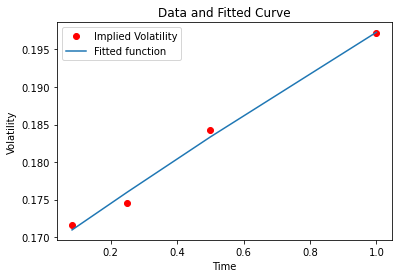

In [11]:
sigma_t = np.zeros(4)
for i in range(0, 4):
  # Formula for our volatility function using optimal parameter values, where sigma_0 = popt[0], a = popt[1], b = popt[2]
  sigma_t[i] = popt[0] * np.exp(-popt[1] * Time[i]) + popt[2]*(1-np.exp(-popt[1]*Time[i]))

# plot the data points and our estimated volatility function
plt.plot(Time, x , 'ro', label='Implied Volatility')
plt.plot(Time, sigma_t, label='Fitted function')
plt.legend()
plt.title('Data and Fitted Curve')
plt.xlabel('Time')
plt.ylabel('Volatility')

**Expected Output:**
![title](figure2.png)

**Return the solutions of the programming task $\href{https://moodle.uni-wuppertal.de/mod/assign/view.php?id=774696}{{here}}$ until Wednesday, June 9. The assignment can be done in groups of 1-2 persons. The solution should be presented within the following 2 weeks via an online arranged ZOOM meeting with M.Sc. Lorenc Kapllani.**

In [12]:
# feel free to use this cell for additional tests

In [13]:
# feel free to use this cell for additional tests

In [14]:
# feel free to use this cell for additional tests